# Fundamentals of Bioinformatics
## Assignment 1
### Daniel Castaneda Mogollon

#### Question 1: Consider how you might transform a uniform random variate drawn from  u∼U(0,1)u∼U(0,1)  to instead be distributed as  v∼Binom(N,p)v∼Binom(N,p) . Note, there are many ways to do this (including a very simple one). Try a few ideas now. You can compare your results to R's builtin function for sampling from a binomial distribution using the below example.

A: I would be using the uniform distribution with only two numbers with a sample size of 10000, and then I would be rounding the number either down or up (to make it discrete for success or failure). That means that the random variables I am taking from the rounding will be either 0 or 1, just as the uniform distribution shows. Then I would plot the results to see if it follows a binomial distribution:

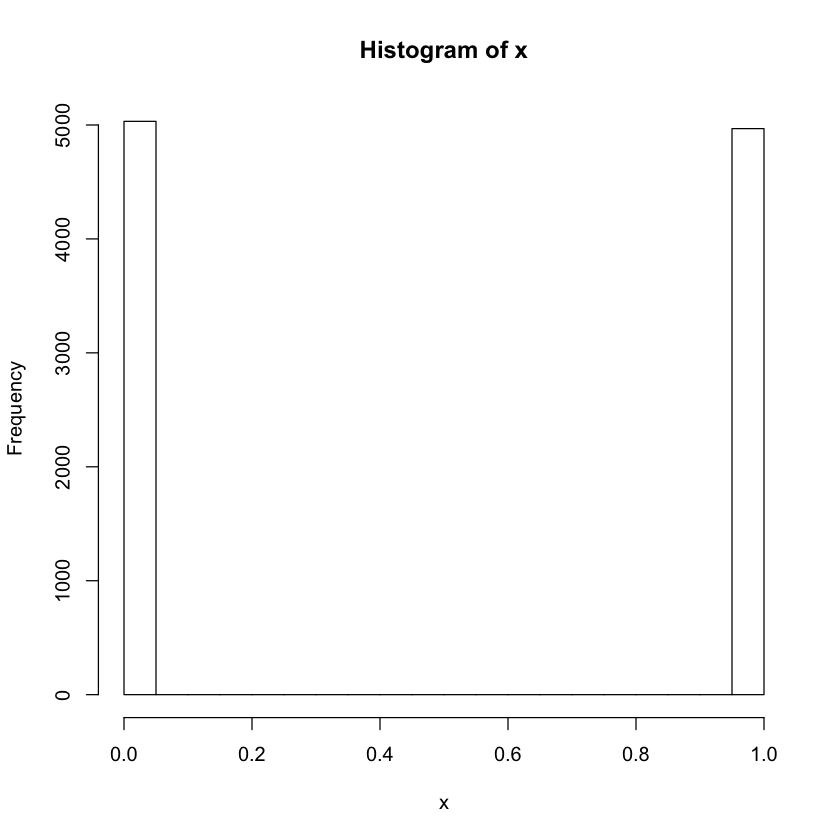

In [8]:
x<-round(runif(10000,0,1))
hist(x)

#### Question 2: Inspect the h1 and h2 objects. What variables do they contain? What do these correspond to? Use the help system and some experimentation to decide.


There are seven variables for each h1, and h2. In both cases we have the number of breaks, the counts, density, mids, equidist, and the class attribute. They are basically describing the distribution of the binomial when the probability of success is 0.50 or 0.48, depending on the variable (h1 or h2). It will tell us the breaks between each rectangle of the histogram, the number of times a tail or a head was obtained in each case. The density represents the statistical density of the number of times a success was recorded in comparison to the number of times we tossed the coin. The xname is the name of the 'x' axis, the equidist is a logical value showing if the space between the breaks have the same size, and the class is the type of object, which in this case is a histogram. The mids represent the point where there is a separation between breaks.

#### Question 3: How can you improve the distinguishability of values for  pp  close to 0.5? Do it, and include two histogram plots to prove you've made progress. One from above, with four values of  p , and another with the same four values of  p . What is the experimental design factor that can be manipulated here? Format your plots to look "publication quality". Save using pdf(); ... dev.off();.

Because the probability of success is very close to 0.5, just like a fair coin being tossed with an unfair coin, then the best way to distinguish between the distributions is to increase the number of times the coin is being tossed, which is shown in the following code:

pdf 
  2

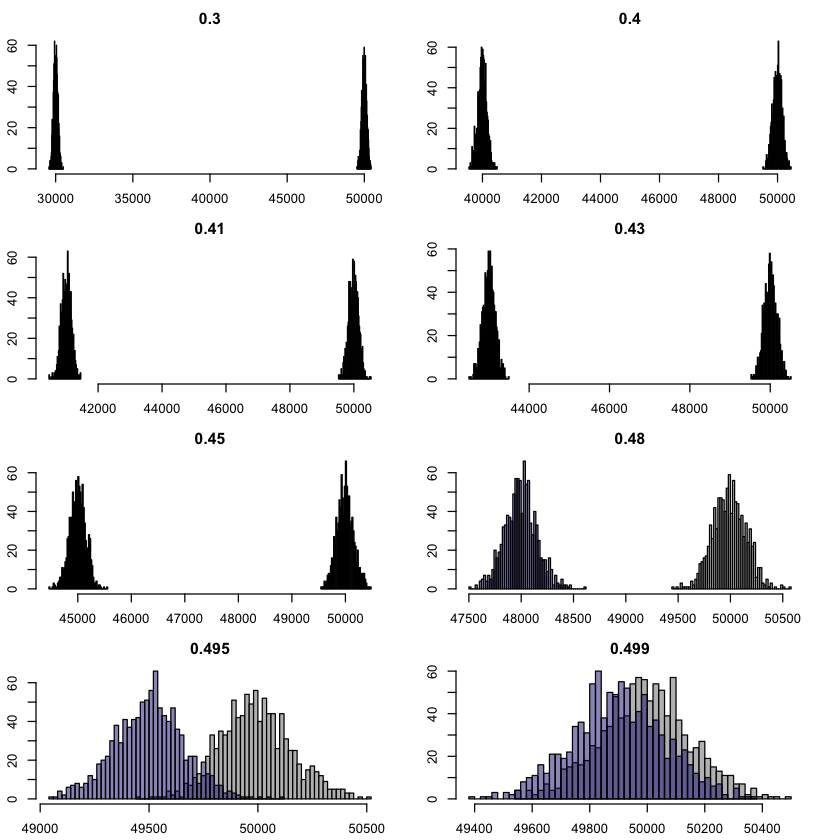

In [79]:
# Plot four histograms as above showing the identifiability of small differences in p
## par() is a confusing function that can set a variety of graphical parameters
## par( mfrow ) sets (row, column) for multi-plots
## par( mai ) sets margins
pdf("/Users/Danniel/Desktop/Fundamentals of bioinformatics/pdf_assignment1.pdf")
par( mfrow = c(4,2), mai=c(0.3,0.3,0.3,0.3) );
Ps = c(0.30,0.40,0.41,0.43, 0.45, 0.48, 0.495, 0.499 );

for (i in 1:8) {
  U1 <- rbinom( n=1000, size=100000, p=0.50 ); h1 <- hist(U1,plot=FALSE, n=50);
  U2 <- rbinom( n=1000, size=100000, p=Ps[i] ); h2 <- hist(U2,plot=FALSE, n=50);

  plot( h1, xlim=c( min(h1$breaks, h2$breaks), max( h1$breaks, h2$breaks) ),
      ylim=c( min( h1$counts, h2$counts ), max( h1$counts, h2$counts ) ),
      main=Ps[i], xlab='Num heads', col='grey');
  plot( h2, add=TRUE, col=rgb(.1,.1,.5,.5) );
}
dev.off()

par( mfrow = c(4,2), mai=c(0.3,0.3,0.3,0.3) );
Ps = c(0.30,0.40,0.41,0.43, 0.45, 0.48, 0.495, 0.499 );
for (i in 1:8) {
  U1 <- rbinom( n=1000, size=100000, p=0.50 ); h1 <- hist(U1,plot=FALSE, n=50);
  U2 <- rbinom( n=1000, size=100000, p=Ps[i] ); h2 <- hist(U2,plot=FALSE, n=50);

  plot( h1, xlim=c( min(h1$breaks, h2$breaks), max( h1$breaks, h2$breaks) ),
      ylim=c( min( h1$counts, h2$counts ), max( h1$counts, h2$counts ) ),
      main=Ps[i], xlab='Num heads', col='grey');
  plot( h2, add=TRUE, col=rgb(.1,.1,.5,.5) );
}

If we increase both our sample size, and the number of times we record the trial or experiment from the sample size given (this would be the 'size' variable from rbinom), then we can distinguish which one is more likely to have a probability of 0.5, and which one does not. The blue distribution represents the 'unfair' coin, whereas the gray represents the 'fair' coin. As we approach to a 0.5 value in both cases, the distributions start to get closer and closer.

#### Question 4: Draw the likelihood surface and MLE, as above, using grid search for experiments corresponding to the conditions used for your four histograms in section 3. Save using pdf(); ... dev.off();. Note any problems observed.

As we can observe here, the MLE is estimated across different binomial distributions by employing four different success probabilities of c(0.45, 0.48, 0.495, 0.499), this after running it under 1,000 trials of one distribution per trial:

pdf 
  2

With a p of 0.45 MLE:  0.45

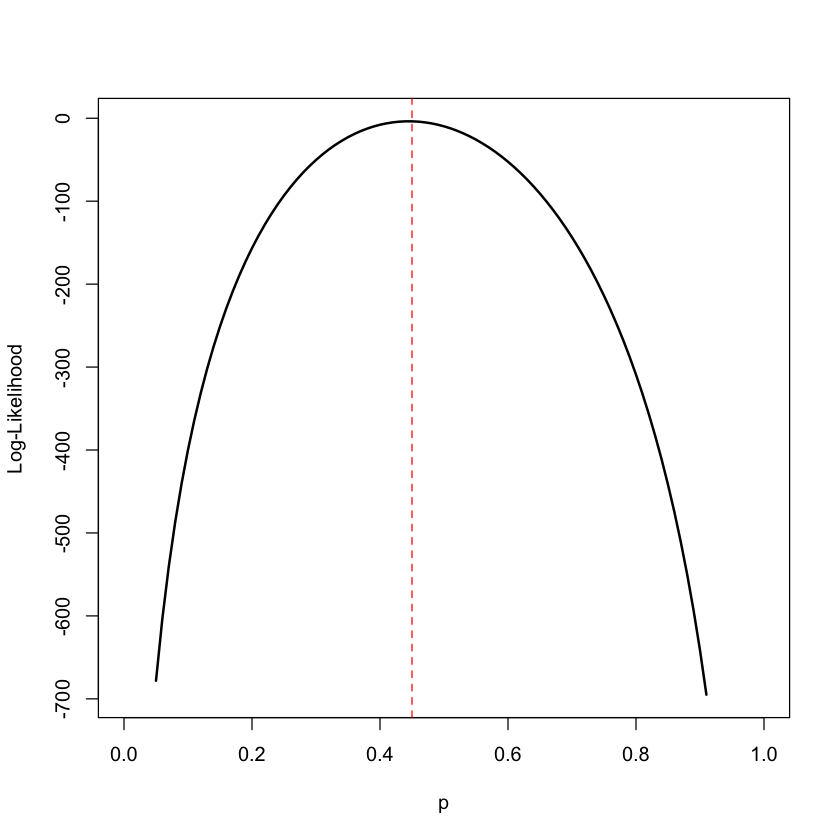

With a p of 0.48 MLE:  0.46

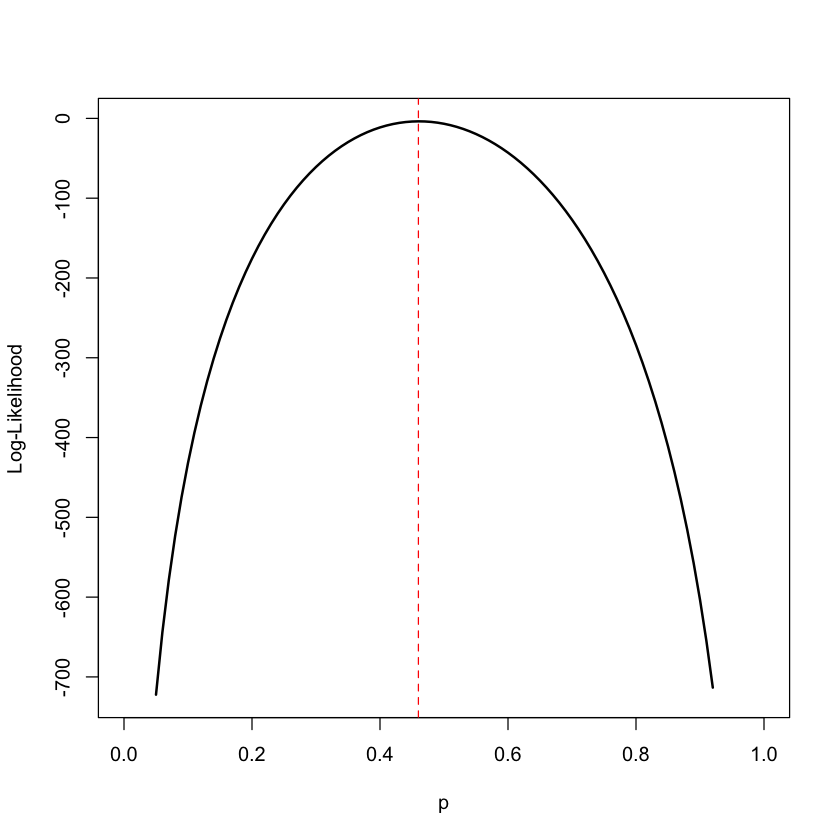

With a p of 0.495 MLE:  0.49

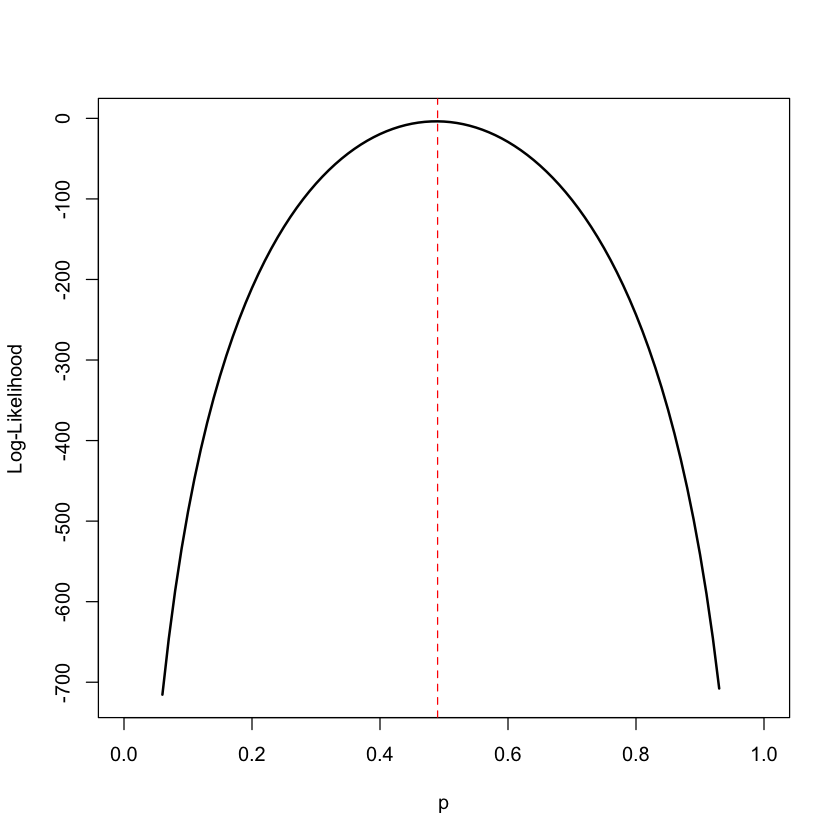

With a p of 0.499 MLE:  0.5

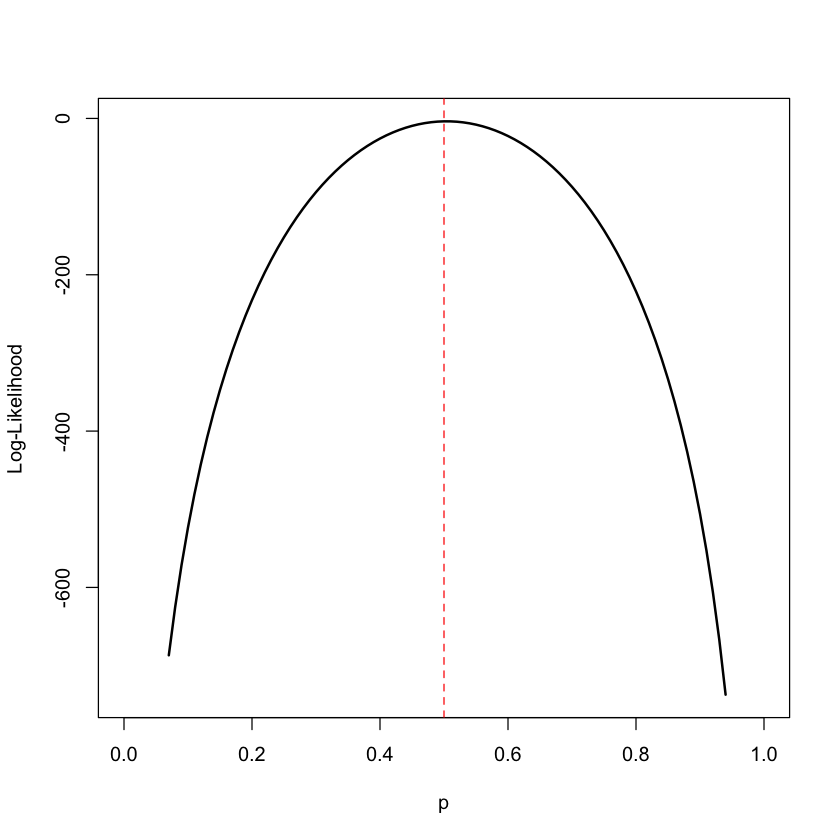

In [102]:
pdf("/Users/Danniel/Desktop/Fundamentals of bioinformatics/mle_pdf.pdf")
nTrials <- 1000;
probabilities = c(0.45, 0.48, 0.495, 0.499)
for (i in 1:4){
    U <- rbinom( n=1, size=nTrials, p=probabilities[i] );
    
    # Get x,y values for the pdf, NOTE the use of lapply()
    xValues <- seq(0,1,0.01);
    yValues <- unlist( lapply( xValues, function(y) log(dbinom(U,size=nTrials,p=y)) ) );

    plot(xValues, yValues, type='l', ylab='Log-Likelihood', xlab='p', lwd=2);
        
    # Q: What is the maximum likelihood estimate of p?
    pHat <- xValues[ yValues == max( yValues )];
    values<-c("MLE: ", pHat)
    #cat("With a p of", probabilities[i],values)
    
                          
    # Draw a dashed vertical line at the maximum
    abline( v = pHat, lty='dashed', col='red' ) #this shows the red line where the 'x' axis has the maximum likelihood
}
dev.off()
                              nTrials <- 1000;
probabilities = c(0.45, 0.48, 0.495, 0.499)
for (i in 1:4){
    U <- rbinom( n=1, size=nTrials, p=probabilities[i] );
    
    # Get x,y values for the pdf, NOTE the use of lapply()
    xValues <- seq(0,1,0.01);
    yValues <- unlist( lapply( xValues, function(y) log(dbinom(U,size=nTrials,p=y)) ) );

    plot(xValues, yValues, type='l', ylab='Log-Likelihood', xlab='p', lwd=2);
        
    # Q: What is the maximum likelihood estimate of p?
    pHat <- xValues[ yValues == max( yValues )];
    values<-c("MLE: ", pHat)
    cat("With a p of", probabilities[i],values)
    
                          
    # Draw a dashed vertical line at the maximum
    abline( v = pHat, lty='dashed', col='red' ) #this shows the red line where the 'x' axis has the maximum likelihood
}
                              

#### Question 5: Create a logL() function using the above template. The function you will use below, optim(), expects that the first argument the function takes is the set of parameters to be optimized and the function is expected to return a scalar value. The return value should be the log-likelihood. Integrate this with the code below, which calls optim() and show how well your estimator performs. NOTE you will have to catch non-finite values in a conditional using is.finite().

In [2]:
# Log-likelihood function
lnl <- function(p, numH, numTrials ){
    if(p<0.01){
        p=p+0.001
    }
    if(p>0.99){
        p=p-0.001
    }
    y_value<-log(dbinom(dist,size=numTrials,p=p))
    true=is.finite(y_value)
    if(true==TRUE){
        return(y_value)
    }
    else{
        return(-700000000) #to avoid -inf values, for some reason try and catch did not work for me...
        }
} 

# Simulate data
P=0.5; N=1000;
dist = rbinom(n=1, size=N, p=P);

# Get the MLE
start=0.5; # starting value
mle = optim(start, lnl, NULL, method = "L-BFGS-B", lower=0, upper=1.0, control=list(fnscale=c(-1)), numH=dist, numTrials = N);
pHat = mle$par
maxLnL = mle$value;

cat(c("The best success probability p is :", mle$par," with a MLE of: ", mle$value));

The best success probability p is : 0.507999978657757  with a MLE of:  -3.67979106106336

In [6]:
## Q: Repeat for different true value of p used in part 1
Ps = c( 0.5, 0.48, 0.49, 0.495, 0.499 );
N=10000;
LR=as.numeric();

for (i in 2:5) {
  dist <- rbinom( n=1, size=N, p=Ps[i] );
  start=0.50;
  mle = optim(start, lnl, NULL, method = "L-BFGS-B", lower=0, upper=1.0, control=list(fnscale=c(-1)), numH=dist, numTrials = N);
  pHat = mle$par;
  maxLnL = mle$value;
  lnLNull = lnl( 0.5, numH = U, numTrials = N );
  LR[i-1] <-  maxLnL - lnLNull ;
  
  # Print the true value of p and the LR  
  print(c(Ps[i], pHat, LR[i-1]))
}

[1]  0.4800000  0.4722001 15.4647736
[1] 0.4900000 0.4962000 0.2888028
[1] 0.4950000 0.4932000 0.9248285
[1] 0.4990 0.4997 0.0018


***
<img style="float: left; margin:0px 20px" src="img/question.jpg">
<B>Question 6:</B> How might you determine if a likelihood ratio is "significant"? What would you get if you produced a LR distribution for data simulated under $p=0.5$?

We could perform a likelihood ratio test. This test is done by comparing the log likelihood of the maximum likelihood given "p hat" vs the log likelihood of our parameter set by a null hypothesis. This is usually done by:

LR = 2*(Log L|p hat under ML) - (Log L|null hypothesis of p)

If LR is large, then we can assume that the ML of the parameter is not the same as the one we obtained, and therefore we reject the null hypothesis of equal values between the log L of p hat MLE, and the log L of our parameter estimated. If LR is small, then we fail to reject the null hypothesis. In the previous example, we can see how when we compare 0.48 vs 0.50, the likelihood ratio is larger than 0.49, 0.495, and 0.499; therefore the first one can be rejected.


***
<img style="float: left; margin:0px 20px" src="img/question.jpg">
<B>Question 7 (BONUS):</B> Can you come up with a better way to estimate the binomial probability $p$ by maximum likelihood? Full derivation only.

Because we are looking at a peak in our likelihood curve, then we are looking for a derivative equal to zero. If we reach that peak, then we are going to have an horizontal line that explains the value of the derivative.

First, we have to define log likelihood in terms of 'p' and 'x (number of heads)', then we solve the derivative on terms of p (the parameter we are looking for), and then set the derivative to zero (slope of zero at max likelihood), and we will obtain that p hat = x/n

See image attached to the email for the full derivation process